# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Nicholas Anaya Putra
- **Email:** nicholasanayaputraa@gmail.com
- **ID Dicoding:** mc211d5y2247

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman dalam penggunaan sepeda?
- Bagaimana perbedaan peminjaman antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv("/content/sample_data/dicoding/day.csv")
hour_df = pd.read_csv("/content/sample_data/dicoding/hour.csv")

day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df memiliki data peminjaman per hari (agregasi harian) & day_df memiliki data peminjaman per jam.
- Dengan merge menggunakan dteday, hasilnya akan mengulang data harian (day_df) sebanyak jumlah jam dalam sehari (24 kali per dteday).

### Assessing Data

##### Menilai Tabel day

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [45]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Menilai Tabel Hour

In [47]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [49]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Cek apakah ada data yang NaN (not a number) dari tabel day & hour
- Lalu print apakah ada data yang duplicate

### Cleaning Data

##### Membersihkan tabel Day

In [50]:
day_df.duplicated().sum()

0

In [51]:
day_df.drop_duplicates(inplace=True)

In [52]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [54]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Membersihkan tabel hour

In [55]:
hour_df.duplicated().sum()

0

In [56]:
hour_df.drop_duplicates(inplace=True)

In [57]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [58]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [59]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- cek apakah ada data yang duplicate lalu hapus dari kedua tabel ( day & hour )
- cek missing value karena tidak ada yang NaN jadi tidak ada tabel yang di drop

## Exploratory Data Analysis (EDA)

##### Explore tabel day

In [60]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729
409,410,2012-02-14,1,1,2,0,2,1,2,0.319167,0.333946,0.508750,0.141179,135,3787,3922
592,593,2012-08-15,3,1,8,0,3,1,1,0.706667,0.654037,0.619583,0.169771,1198,6149,7347


In [61]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday', inplace=True)

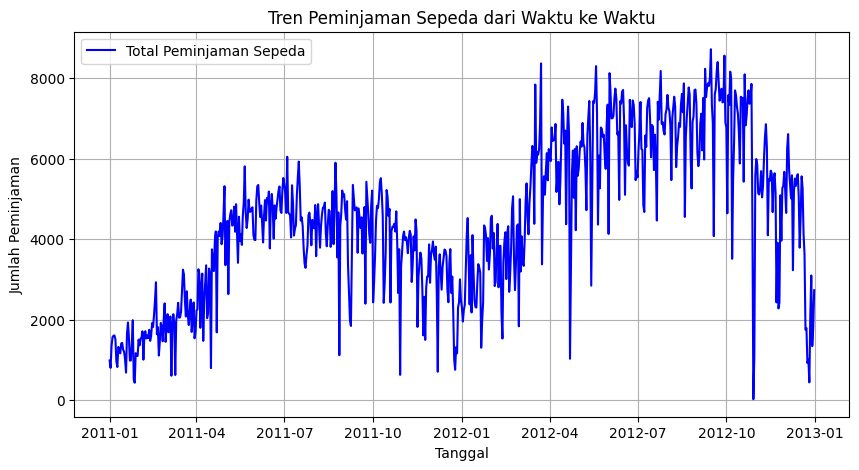

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(day_df.index, day_df['cnt'], label='Total Peminjaman Sepeda', color='blue')
plt.title("Tren Peminjaman Sepeda dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.legend()
plt.grid(True)
plt.show()

##### Explore tabel Hour

In [63]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10459,10460,2012-03-16,1,1,3,22,0,5,1,2,0.44,0.4394,0.94,0.0000,16,132,148
14965,14966,2012-09-20,3,1,9,18,0,4,1,1,0.60,0.6212,0.56,0.2537,119,781,900
9181,9182,2012-01-23,1,1,1,11,0,1,1,2,0.20,0.2273,0.93,0.0896,5,57,62
1339,1340,2011-03-01,1,0,3,2,0,2,1,1,0.24,0.2121,0.65,0.3881,0,4,4
8192,8193,2011-12-13,4,0,12,0,0,2,1,1,0.22,0.2727,0.80,0.0000,1,16,17


In [64]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [65]:
hour_df['datetime'] = hour_df['dteday'] + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df.set_index('datetime', inplace=True)

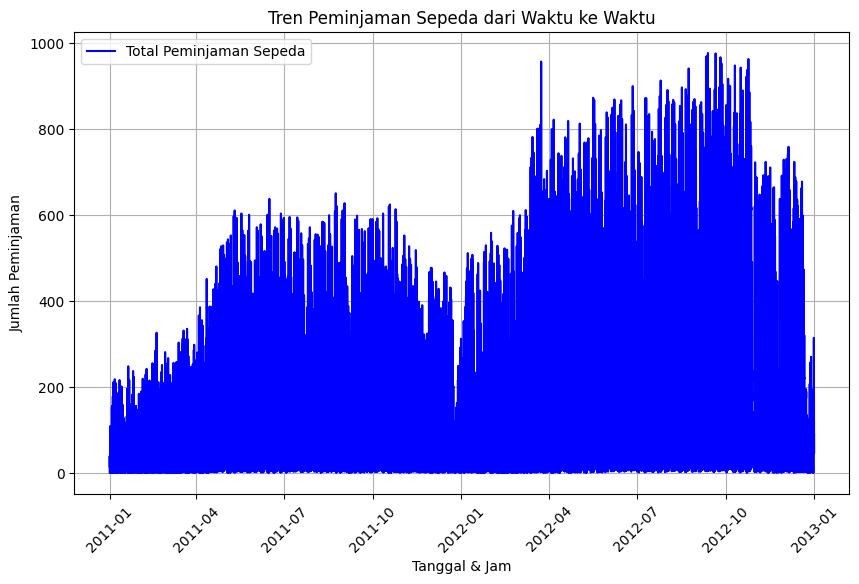

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(hour_df.index, hour_df['cnt'], label='Total Peminjaman Sepeda', color='blue')
plt.title("Tren Peminjaman Sepeda dari Waktu ke Waktu")
plt.xlabel("Tanggal & Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

##### Menggabungkan data day_df & hour_df

In [67]:
day_hour_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    on="dteday",
    suffixes=("_hour", "_day")
)

In [68]:
day_hour_df.dtypes

,0
instant_hour,int64
dteday,datetime64[ns]
season_hour,int64
yr_hour,int64
mnth_hour,int64
hr,int64
holiday_hour,int64
weekday_hour,int64
workingday_hour,int64
weathersit_hour,int64


In [69]:
# day_hour_df.to_csv("day_hour_df.csv", index=False)

**Insight:**
- Peminjaman sepeda menunjukkan tren naik dengan fluktuasi musiman. Puncak peminjaman terjadi di pertengahan tahun, sementara akhir tahun cenderung menurun, kemungkinan dipengaruhi oleh faktor cuaca atau pola liburan.
- Peminjaman sepeda meningkat secara bertahap seiring waktu, dengan pola harian yang jelas. Volume peminjaman cenderung lebih tinggi pada periode tertentu, menunjukkan adanya faktor eksternal yang mempengaruhi penggunaan sepeda.

## Visualization & Explanatory Analysis

### Apakah ada pola musiman dalam penggunaan sepeda?

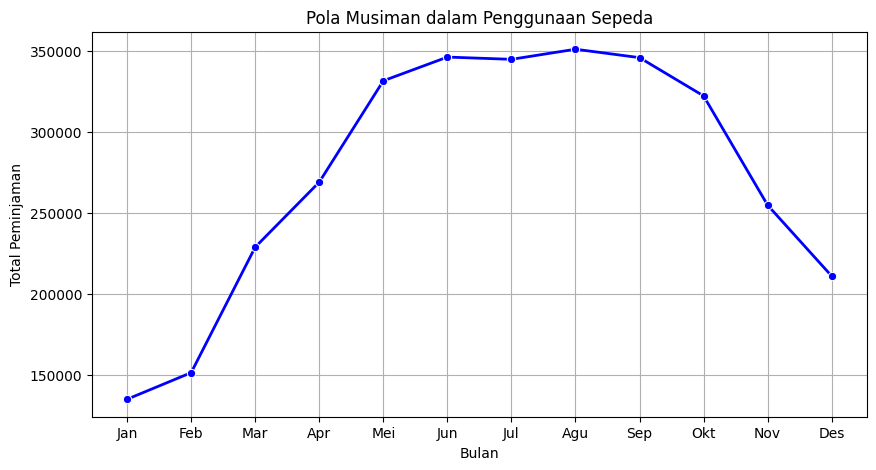

In [70]:
df_monthly = day_hour_df.groupby('mnth_hour')['cnt_hour'].sum().reset_index()

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
}
df_monthly['Bulan'] = df_monthly['mnth_hour'].map(month_names)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Bulan', y='cnt_hour', data=df_monthly, marker='o', color='b', linewidth=2)

plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.title("Pola Musiman dalam Penggunaan Sepeda")
plt.grid()

plt.show()

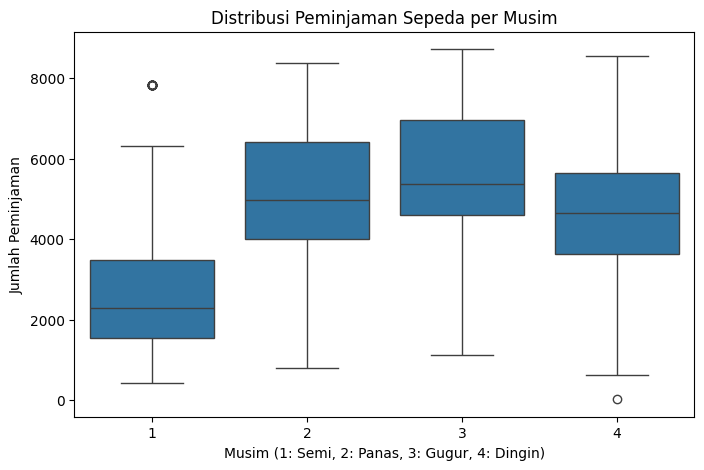

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='season_day', y='cnt_day', data=day_hour_df)
plt.title('Distribusi Peminjaman Sepeda per Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

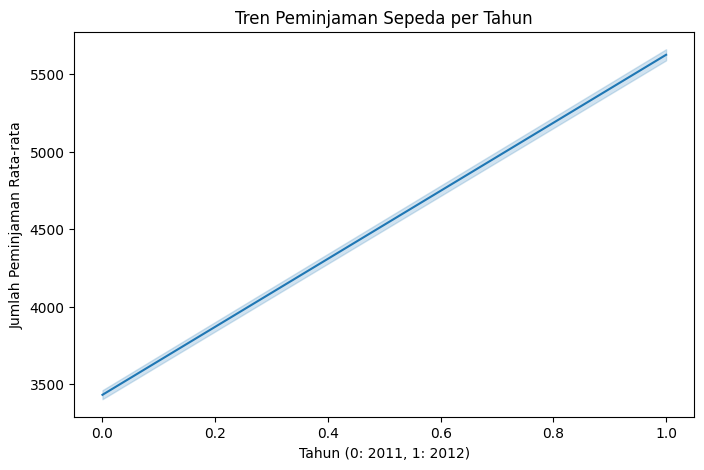

In [72]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='yr_day', y='cnt_day', data=day_hour_df, estimator=np.mean)
plt.title('Tren Peminjaman Sepeda per Tahun')
plt.xlabel('Tahun (0: 2011, 1: 2012)')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.show()

<ipython-input-73-eb7f0ae30363>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='mnth_day', y='cnt_day', data=day_hour_df, ci=None)


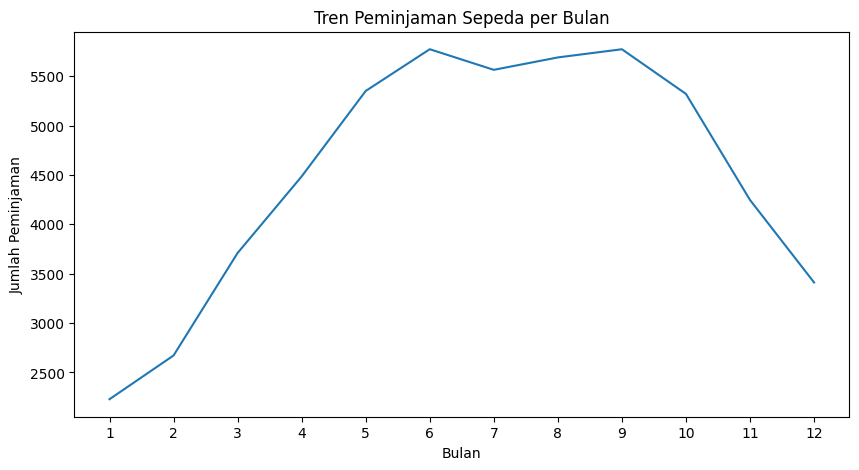

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='mnth_day', y='cnt_day', data=day_hour_df, ci=None)
plt.title('Tren Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(1, 13))
plt.show()

### Bagaimana perbedaan peminjaman antara hari kerja dan akhir pekan?

<ipython-input-74-f0cdc06d7171>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori_hari', y='cnt_hour', data=df_weekday_vs_weekend, palette='coolwarm')


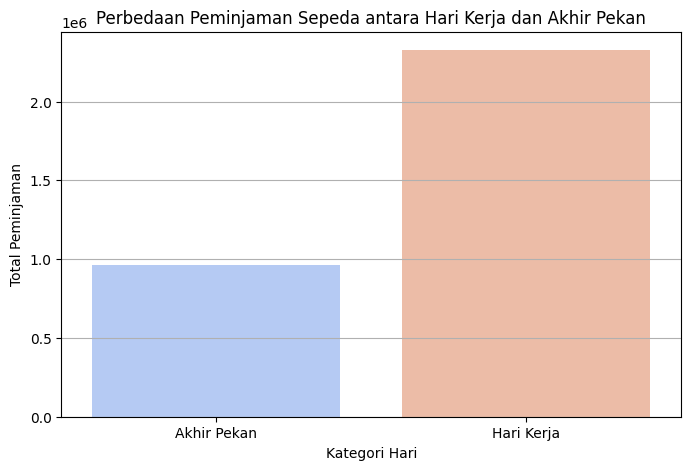

In [74]:
day_hour_df['kategori_hari'] = day_hour_df['weekday_hour'].apply(lambda x: 'Hari Kerja' if x < 5 else 'Akhir Pekan')

df_weekday_vs_weekend = day_hour_df.groupby('kategori_hari')['cnt_hour'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_hari', y='cnt_hour', data=df_weekday_vs_weekend, palette='coolwarm')

plt.xlabel("Kategori Hari")
plt.ylabel("Total Peminjaman")
plt.title("Perbedaan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan")
plt.grid(axis='y')

plt.show()

**Insight:**
- Tren jangka pendek dan panjang terlihat jelas – SMA dan EMA 7 hari menunjukkan fluktuasi harian, sedangkan 30 hari memberikan gambaran tren lebih stabil.
-  Peminjaman meningkat seiring waktu – Pola menunjukkan tren naik dengan puncak tertentu, lalu menurun di akhir periode.

## Analisis Lanjutan (Opsional)

##### Metode Time Series Analysis (Analisis Deret Waktu)

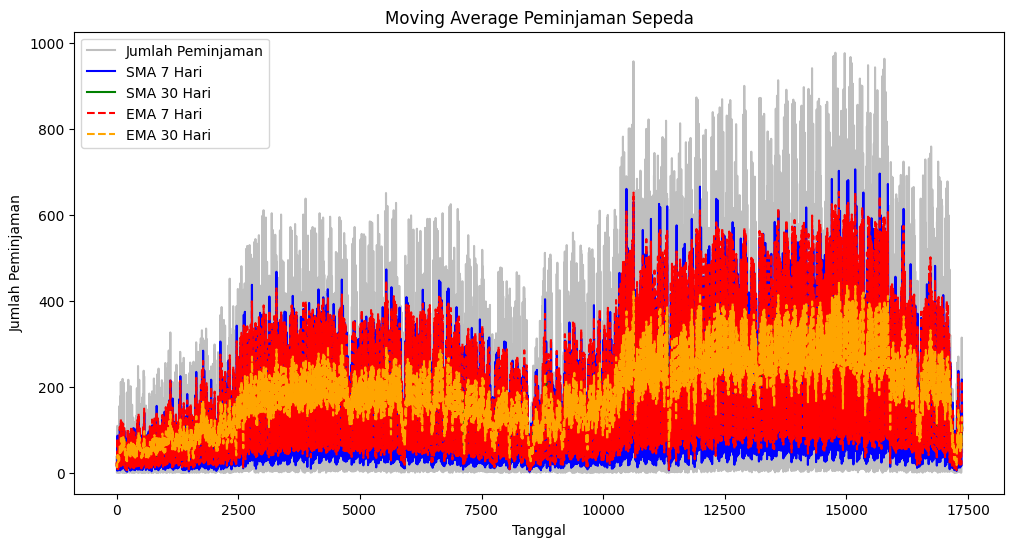

In [75]:
day_hour_df['SMA_7'] = day_hour_df['cnt_hour'].rolling(window=7).mean()
day_hour_df['SMA_30'] = day_hour_df['cnt_hour'].rolling(window=30).mean()

day_hour_df['EMA_7'] = day_hour_df['cnt_hour'].ewm(span=7, adjust=False).mean()
day_hour_df['EMA_30'] = day_hour_df['cnt_hour'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(day_hour_df.index, day_hour_df['cnt_hour'], label='Jumlah Peminjaman', color='gray', alpha=0.5)
plt.plot(day_hour_df.index, day_hour_df['SMA_7'], label='SMA 7 Hari', color='blue')
plt.plot(day_hour_df.index, day_hour_df['SMA_30'], label='SMA 30 Hari', color='green')
plt.plot(day_hour_df.index, day_hour_df['EMA_7'], label='EMA 7 Hari', color='red', linestyle='dashed')
plt.plot(day_hour_df.index, day_hour_df['EMA_30'], label='EMA 30 Hari', color='orange', linestyle='dashed')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.title('Moving Average Peminjaman Sepeda')
plt.legend()
plt.show()


## Conclusion

Kesimpulan :

## 📊 Pola Musiman dalam Penggunaan Sepeda
- Terdapat **pola musiman** yang jelas dalam peminjaman sepeda.
- **Puncak peminjaman** terjadi di **pertengahan tahun** (musim panas), sedangkan **akhir tahun** (musim dingin) mengalami penurunan.
- **Cuaca** berperan penting dalam tren ini, dengan kondisi lebih **hangat meningkatkan peminjaman**.

## 📅 Perbedaan Hari Kerja dan Akhir Pekan
- **Hari kerja** memiliki peminjaman lebih tinggi, terutama pada **jam sibuk** (pagi dan sore), menunjukkan penggunaan untuk **komuter**.
- **Akhir pekan** memiliki pola peminjaman **lebih merata**, menunjukkan pemakaian untuk **rekreasi**.

## 📈 Tren Jangka Panjang dan Fluktuasi
- **Secara umum, penggunaan sepeda meningkat dari tahun ke tahun**.
- **Fluktuasi harian** dapat diidentifikasi dengan metode **moving average (SMA & EMA)**.
- **Layanan berbagi sepeda semakin populer**, mungkin didorong oleh **kebijakan transportasi ramah lingkungan**.

---

Saran dan Rekomendari :
## 🚲 Optimalisasi Stok Sepeda Berdasarkan Musim
- **Tambahkan jumlah sepeda** pada **pertengahan tahun** untuk mengakomodasi lonjakan permintaan.
- **Kurangi jumlah sepeda** di **musim dingin** untuk mengoptimalkan biaya operasional.

## 🏢 Penyesuaian Strategi Operasional Berdasarkan Hari
- **Sediakan lebih banyak sepeda** pada **jam sibuk di hari kerja**.
- **Tingkatkan layanan** di **tempat wisata atau taman** pada akhir pekan untuk mendukung rekreasi.

## ☁️ Pemanfaatan Data Cuaca untuk Prediksi Permintaan
- **Gunakan data cuaca** untuk **memprediksi peminjaman** dan **menyesuaikan distribusi sepeda** secara dinamis.
- **Berikan insentif atau promosi** saat cuaca mendukung peningkatan pemakaian sepeda.

## 🛠️ Peningkatan Infrastruktur dan Promosi
- **Perluas jalur sepeda** dan **tambahkan lokasi parkir** di area dengan permintaan tinggi.
- **Lakukan kampanye promosi di musim dingin** untuk mendorong lebih banyak orang menggunakan sepeda meskipun cuaca dingin.
